Name: Sai Deepika Sunkesula

# Task 6: Prediction using Decision Tree Algorithm

### Importing required libraries and reading Iris dataset.

In [7]:
import io
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Read Iris dataset from csv file.
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

### Splitting data into train and test set and scaling input data.

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fitting training data to Decision Tree Classifier

In [9]:
decision_tree = DecisionTreeClassifier(criterion="gini")
decision_tree = decision_tree.fit(X_train, y_train)

### Calculating prediction accuracy for test data.

In [10]:
y_test_predicted = decision_tree.predict(X_test)
print("Test split accuracy percentage: ", 100 * metrics.accuracy_score(y_test, y_test_predicted))

Test split accuracy percentage:  100.0


### Visualize the decision tree classifier fitted from training data

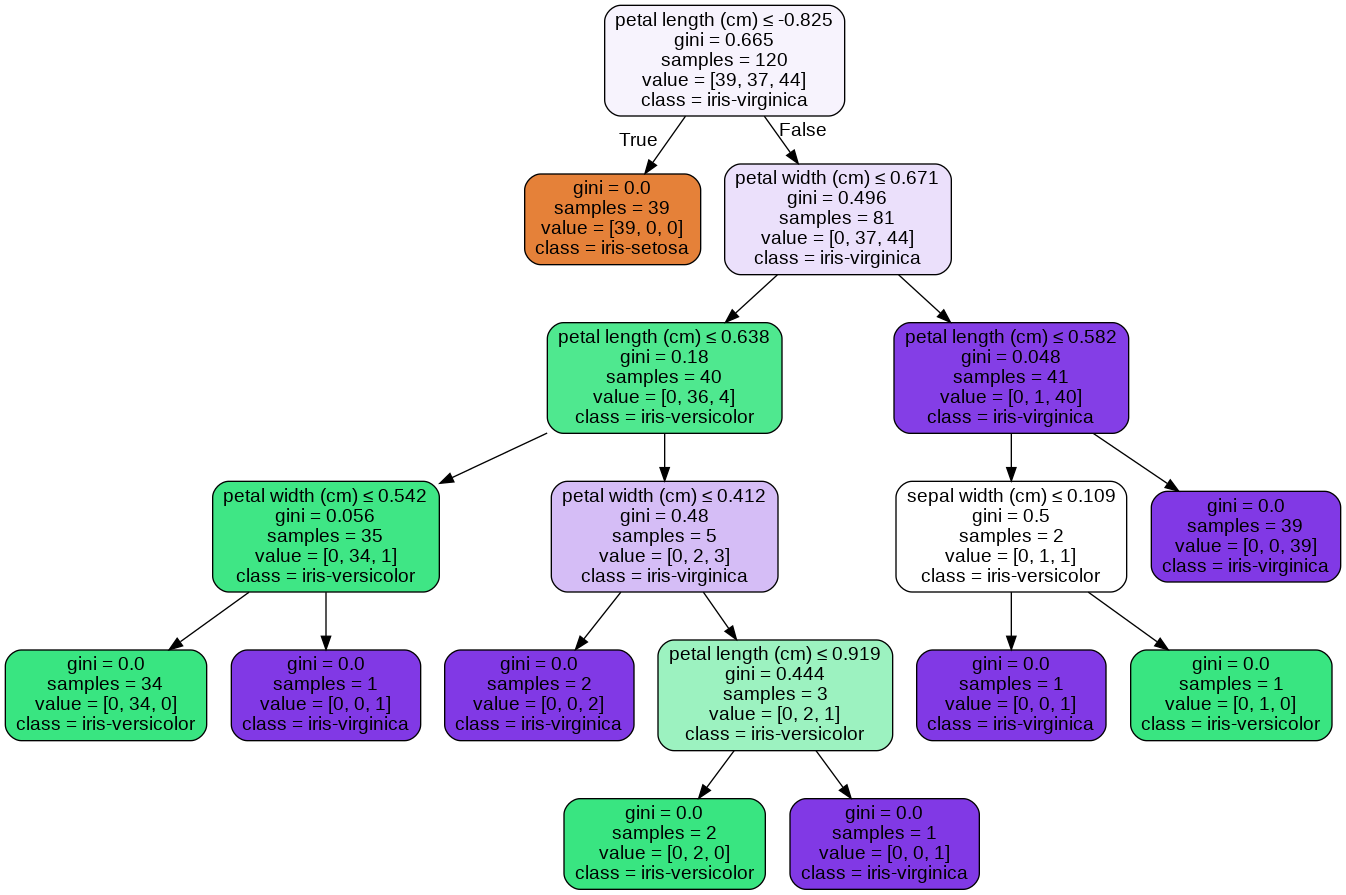

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = iris_dataset.feature_names,
                class_names = ['iris-setosa', 'iris-versicolor', 'iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())